In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf
import cv2 as cv
from google.colab.patches import cv_imshow

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print('X Training shape: ',x_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',x_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (60000, 28, 28)
Y Training shape:  (60000,)
X Testing shape:  (10000, 28, 28)
Y Testing shape:  (10000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


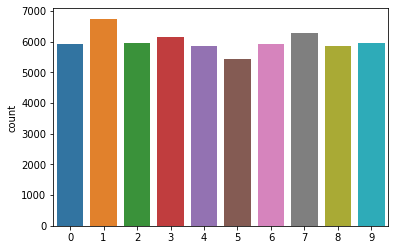

In [ ]:
sns.countplot(y_train)

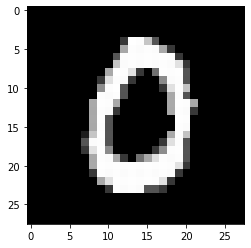

In [ ]:
plt.imshow(x_train[320], cmap='gray')
plt.show()


In [ ]:
input_shape = (28,28,1)

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
# plt.imshow(x_train[2], cmap='gray')
# plt.show()
batch_size = 128
num_classes = 10
epochs = 5

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)             

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 7s 15ms/step - loss: 0.4493 - accuracy: 0.8607 - val_loss: 0.0976 - val_accuracy: 0.9745
Epoch 2/5
422/422 [==============================] - 5s 12ms/step - loss: 0.1491 - accuracy: 0.9542 - val_loss: 0.0690 - val_accuracy: 0.9815
Epoch 3/5
422/422 [==============================] - 4s 11ms/step - loss: 0.1166 - accuracy: 0.9648 - val_loss: 0.0561 - val_accuracy: 0.9862
Epoch 4/5
422/422 [==============================] - 4s 11ms/step - loss: 0.0993 - accuracy: 0.9698 - val_loss: 0.0487 - val_accuracy: 0.9870
Epoch 5/5
422/422 [==============================] - 4s 11ms/step - loss: 0.0866 - accuracy: 0.9731 - val_loss: 0.0429 - val_accuracy: 0.9877


In [ ]:
print(history.history)

{'loss': [0.44933071732521057, 0.1490781009197235, 0.11663610488176346, 0.0992869883775711, 0.08657409995794296], 'accuracy': [0.860703706741333, 0.9542407393455505, 0.9648333191871643, 0.9697962999343872, 0.9730555415153503], 'val_loss': [0.09755560010671616, 0.06904816627502441, 0.056088924407958984, 0.048660971224308014, 0.04287869855761528], 'val_accuracy': [0.9745000004768372, 0.9815000295639038, 0.9861666560173035, 0.9869999885559082, 0.987666666507721]}


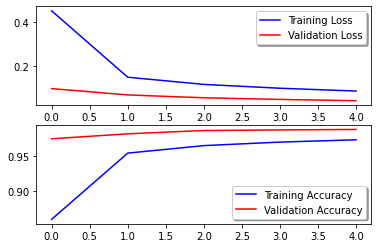

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9869


In [ ]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

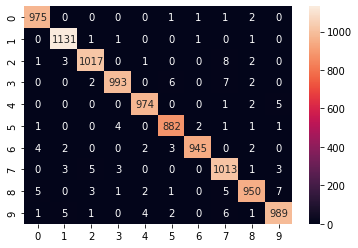

In [ ]:
sns.heatmap(confusion_mtx, annot=True, fmt='g')

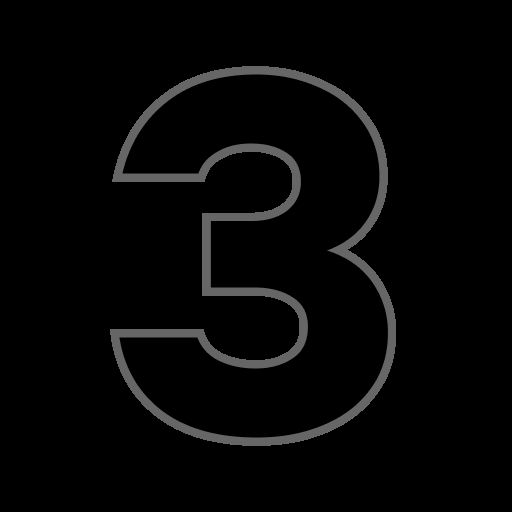

In [ ]:
img = cv.imread('/content/3.png')
cv_imshow(img)

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(512, 512)

In [ ]:
img_rs = cv.resize(gray, (28, 28))

In [ ]:
img_rs.shape

(28, 28)

In [ ]:
cv_imshow(img_rs)

In [ ]:
img_rs = np.expand_dims(img_rs,0)

In [ ]:
img_rs.shape

(1, 28, 28)

In [ ]:
img_rs = np.expand_dims(img_rs,-1)

In [ ]:
img_rs.shape

(1, 28, 28, 1)

In [ ]:
num = model.predict(img_rs)
num

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
from numpy.core.fromnumeric import argmax
result = rs[argmax(num)]

In [ ]:
result

8